<a href="https://colab.research.google.com/github/DoLienKhoa/KHDLUD/blob/Anh/KHDLUD_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I. Giới thiệu cuộc thi

## 1. Mục tiêu cuộc thi
- Mục tiêu của cuộc thi [M5 Forecasting - Accuracy](https://www.kaggle.com/competitions/m5-forecasting-accuracy/overview/) là dự đoán được số lượng sản phẩm bán được của từng loại mặt hàng trong chuỗi cửa hàng của Walmart, cụ thể như trong văn bản hướng dẫn (Hyperlink trong M5) thì ta sẽ dự đoán 28 ngày kể từ thời điểm cuối của bộ dữ liệu đã cho. Trong cuộc thi [M5](https://github.com/Mcompetitions/M5-methods/blob/master/M5-Competitors-Guide.pdf) này có mục tiêu là tìm ra phương pháp tốt nhất để đưa ra dự đoán chính xác nhất có thể, để dự đoán trên bộ series dữ liệu gồm có 42,840 series. 

## 2. Giới thiệu bộ dữ liệu.

### Bảng thể hiện sự tổ chức dữ liệu.

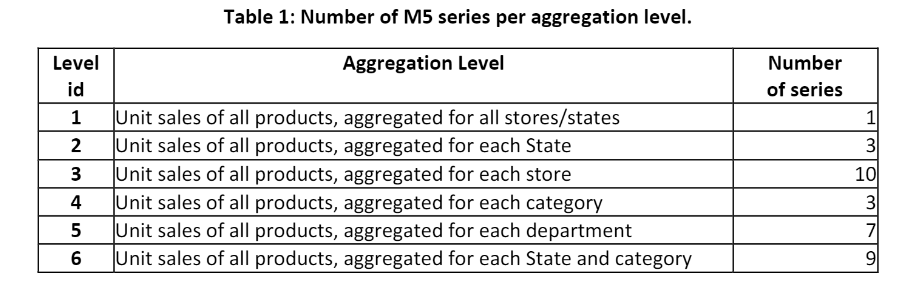

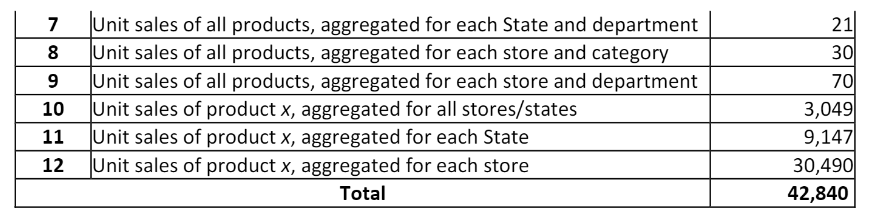

### Hình minh họa cấu trúc lưu trữ của bộ dữ liệu.
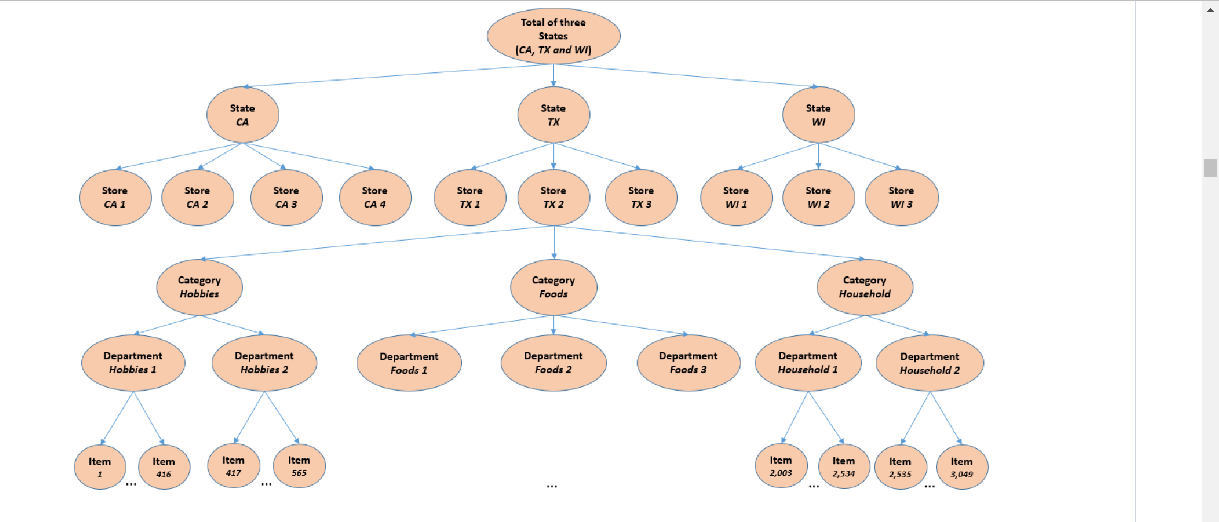

### Tổ chức file
Lưu trữ dữ liệu từ ngày 29/01/2011 đến ngày 19/06/2016. Gồm 3 file:



1.  File "calendar.csv" - chứa thông tin về ngày mà sản phẩm được bán.

  *   date: ngày có định dạng "yyyy-mm-dd".
  *   wm_yr_wk: ID của tuần mà ngày đó thuộc về.
  *   weekday: Loại ngày (Saturday - thứ 7, Sunday - Chủ nhật,..., Friday - Thứ 6).
  *   wday: ID loại ngày, đánh số từ 1-7 bắt đầu từ thứ 7 (Saturday - có ID 1,..., Friday - có ID là 7).
  *   month: Tháng của ngày đó.
  *   year: Năm của ngày đó.
  *   event_name_1: nếu ngày đó có sự kiện gì đó thì cột này ghi tên sự kiện vào.
  *   event_type_1: nếu ngày đó có sự kiện gì đó thì cột này ghi loại sự kiện.
  *   event_name_2: nếu ngày đó có thêm sự kiện ngoài event_name_1 thì cột này ghi tên sự kiện vào.
  *   event_type_2: nếu ngày đó có thêm sự kiện ngoài event_name_1 thì cột này sẽ ghi loại sự kiện.
  *   snap_CA, snap_TX, snap_WI: Mang giá trị 0, 1 nếu tại cửa hàng đó có chương trình [SNAP](https://en.wikipedia.org/wiki/Supplemental_Nutrition_Assistance_Program) (có đề cập chi tiết tại Hyperlink M5 ở trên).


2.   File "sell_price.csv"
  *   store_id: ID của cửa hàng nơi bán sản phẩm.
  *   item_id: ID của sản phẩm.
  *   wm_yr_wk: ID của tuần thuộc về.
  *   sell_price: Giá của sản phẩm của theo tuần/cửa hàng. Giá bán này là trung bình giá trên 1 tuần. Nếu không có giá bán tại ID tuần nhất định nào đó nghĩa là sản phẩm không được bán. Tuy giá thường cố định nhưng vẫn có khả năng thay đổi theo thời gian.

3. File "sale_train.csv"

  * item_id: ID sản phẩm.
  * dept_id: ID phòng ban (department) mà item thuộc về.
  * cat_id: ID phân loại sản phẩm.
  * store_id: ID nơi cửa hàng bán sản phẩm.
  * state_id: ID của Bang (State) mà cửa hàng thuộc về.
  * d_1...d_1913/d_1941: Số lượng đơn vị sản phẩm bán được trong ngày i, tính từ 29/01/2011. Lưu ý bên dưới sẽ giải thích kĩ hơn.

4. Lưu ý: Vì cuộc thi đã kết thúc nên trên trên cuộc thi giờ đây có 2 tập sale_train
  * sale_train_validation: đây là tập dùng cho bảng public leaderboard. Tập này chỉ có tới ngày d_1913.
  * sale_train_evaluation: đây là tập dùng cho bảng private learderboard. Tập này thì có thêm 28 cột nữa lên tới ngày d_1941.
  

### Phương thức đánh giá.

- Trong cuộc thi này, mục tiêu là dự đoán cho h = 28 ngày tới.

- Dự đoán 28 ngày kế tiếp dựa trên bộ dữ liệu đã cho (chi tiết mục [evaluation](https://www.kaggle.com/competitions/m5-forecasting-accuracy/overview/evaluation)). Nên với validation thì submit sẽ dự đoán phải thêm cột từ d_1914 tới d_1941, evaluation thì submit sẽ dự đoán phải thêm cột từ d_1942 tới d_1969.

- Thang độ đo được sử dụng ở đây là Root Mean Squared Scaled Error (RMSSE), là một biến thể của độ đo Mean Absolute Scaled Error - được dùng trong lí thuyết xác suất thông kê để đo độ chính xác của dự đoán.

$RMSSE = \sqrt{\frac{1}{h}\frac{\sum_{t=n+1}^{n+h}(Y_t - \hat{Y_t})^2}{\frac{1}{n-1}\sum_{t=2}^{n}(Y_t - Y_{t-1})^2}}$

Với $Y_t$ là giá trị thực ở tương lai, $\hat{Y_t}$ là giá trị dự đoán, n là số lượng train sample, h là thời gian dự đoán.


- Cuối cùng cuộc thi sẽ xếp hạng điểm dựa theo công thức của cuộc thi là Weighted RMSSE - WRMSSE.

$WRMSSE = \sum_{i=1}^{42840} w_i * RMSSE$

* Với $w_i$ là trọng số cho series thứ i của dữ liệu. Trọng số này sẽ được tính dựa trên 28 ngày cuối trong bộ dữ liệu training cho từng series. Trọng số được tính dựa trên tích lũy hay tổng số tiền dola kiếm được (số đơn vị sản phẩm bán được nhân với giá tiền riêng của nó tại thời điểm đó). Cách tính trong văn bản [M5](https://github.com/Mcompetitions/M5-methods/blob/master/M5-Competitors-Guide.pdf) hướng dẫn như ví dụ dưới:

  * Giả sử có sản phẩm A có tổng thu là 10 đô và B là 12 đô trong 28 ngày dự đoán. Hai sản phẩm này đều bán ở cửa hàng thuộc bang WI nên level id là K = 2. Đồng thời tổng doanh thu có được từ A và B là 22. Giả sử đã có sử dụng mô hình dự đoán nào đó và đã tính được $RMSSE_A = 0.8$, $RMSSE_B = 0.7$ và $RMSSE = 0.77$. Từ đó ta tính được WRMSSE như sau:
    * $WRMSSE = RMSSE_A * w_1 + RMSSE_B * w_2 + RMSSE * w3$
    * $w_1 = \frac{1}{K} * \frac{Sales_A}{Sales_A + Sales_B} $ 
    * $w_2 = \frac{1}{K} * \frac{Sales_B}{Sales_A + Sales_B}$
    * $w_3 = \frac{1}{K} * \frac{Sales}{Sales_A + Sales_B}$
    * $WRMSSE = 0.8 * \frac{1}{2} * \frac{10}{10+12} + 0.7 * \frac{1}{2} * \frac{12}{10+12} + 0.77 * \frac{1}{2} * \frac{22}{10+12} = 0.758$

* Trọng số $w_i$ sẽ tính toán bởi ban tổ chức. Github [này](https://github.com/Mcompetitions/M5-methods/tree/master/validation) có chứa cách thức tính toán bằng ngôn ngữ lập trình R và các lưu ý liên quan.

# II. Cách giải quyết của tác giả

- Code của tác giả là có vị trí top 2 trong bảng xếp hạng private leaderboard, được tổng hợp tại [github](https://github.com/matthiasanderer/m5-accuracy-competition) này. Ngoài ra đây là [github](https://github.com/Mcompetitions/M5-methods) tổng hợp các code tại cuộc thi M5. Một số chỉnh sửa tại đây có thể hữu ích để hiểu vì tác giả lược bớt nhiều thứ tại chính github tác giả.

- Discussion của tác giả: https://www.kaggle.com/competitions/m5-forecasting-accuracy/discussion/164599 

## 1. Phân tích ban đầu.

- Đầu tiên tác giả sử dụng các feature mà có sẵn từ các public notebook khác. Giai đoạn test đầu tiên thì tác giả thấy rõ rằng historical sales feature (cùng với kĩ thuật như lags of X days, rolling means/std for last X days,...) cho ra kết quả không ổn định (Tác giả cũng không liệt kê những notebook nào đã sử dụng để chứng minh)



In [4]:
import pandas as pd
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
prices_df = pd.read_csv('/content/drive/MyDrive/M5-Forecasting-Accuracy-data/sell_prices.csv')

In [8]:
ts = prices_df['wm_yr_wk'].value_counts() 
ts

11609    30490
11621    30490
11604    30490
11605    30490
11606    30490
         ...  
11105    13033
11104    12799
11103    12519
11102    11975
11101    10932
Name: wm_yr_wk, Length: 282, dtype: int64

In [19]:
# Đếm số lượng id tuần có đủ 30490 mặt hàng.
count = 0
for s in ts:
  if s == 30490:
    count += 1

count #Chỉ có đúng 19 id tuần là đủ 30490.

19

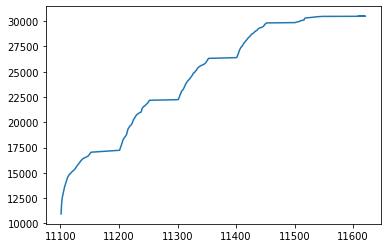

In [30]:
import matplotlib.pyplot as plt
plt.plot(ts)


- Vấn đề đó được nhận định là do sự ngắt quãng trong dữ liệu về doanh số bán hàng là yếu tố gây nhiễu chính (noise). File sale_prices.csv với hàm value_counts đã thể hiện rằng có nhiều id tuần chỉ thể hiện có ~35% thông tin trở lên. Cùng với việc nhóm có lướt qua các discussions khác nhau thì nhiều tác giả cũng nhận thấy sale gây nhiễu khá nhiều.

- Và từ đó tác giả có đưa ra ví dụ về việc lựa chọn các feature thay thế:
  1.   Thông tin về 'lượng kẹo bán được một đơn vị vào thứ Hai và bán được hai đơn vị vào hôm qua' -> Thông tin này không hữu ích vì không đảm bảo có đầy đủ thông tin.
  2.   Thông tin về 'Trong vòng 4 năm, vào thứ Năm lượng kẹo bán được luôn có xu hướng nhiều hơn so với thứ Hai' -> Thông tin này là quan trọng và học được từ các datetime feature.

- Thế nên tác giả hướng tới việc sử dụng các feature khác tính từ 'sale' tốt hơn như mean, std,... 

### Code trích xuất feature

- Vì tác giả có đề cập về giới hạn thời gian nên tác giả sử dụng sẵn notebook trích xuất feature là: https://www.kaggle.com/code/kyakovlev/m5-simple-fe/notebook. Phiên bản cuối khi nộp submission của tác giả nằm ở [github](https://github.com/Mcompetitions/M5-methods/blob/master/Code%20of%20Winning%20Methods/A2/m5-simple-fe-evaluation.ipynb) này:

- Mục tiêu của notebook trên chính là tạo ra một bảng dữ liệu thống nhất các cột feature cần thiết và giảm dung lượng của bảng đó (theo notebook trên kaggle thì phát sinh lên tới 3.5GiB).

### Kết quả trích xuất

In [31]:
pick1 = pd.read_pickle('/content/drive/MyDrive/M5-Forecasting-Accuracy-data/grid_part_1.pkl')
pick1.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release
0,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,29,0.0,0
1,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,29,8.0,0
2,HOBBIES_1_010_CA_1_evaluation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,29,0.0,0
3,HOBBIES_1_012_CA_1_evaluation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,29,1.0,0
4,HOBBIES_1_015_CA_1_evaluation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,29,16.0,0


In [32]:
pick2 = pd.read_pickle('/content/drive/MyDrive/M5-Forecasting-Accuracy-data/grid_part_2.pkl')
pick2.head()
# price_max: Giá bán lớn nhất 
# price_min: Giá bán nhỏ nhất
# price_std: Độ lệch chuẩn
# price_norm: Chuẩn hóa giá. ('sell_price' / price_max)
# price_nunique: số lượng giá bán unique.
# item_nunique: số lượng item unique.
# price_momentum: xu hướng của giá bán theo thời gian(lag 1 days)
# price_momentum_m: xu hướng của giá bán theo tháng
# price_momentum_y: xu hướng của giá bán theo năm.

,id,d,sell_price,price_max,price_min,price_std,price_mean,price_norm,price_nunique,item_nunique,price_momentum,price_momentum_m,price_momentum_y
0,HOBBIES_1_008_CA_1_evaluation,d_29,0.419922,0.500000,0.419922,0.019760,0.476318,0.839844,4.0,12,1.0,0.899902,0.866699
1,HOBBIES_1_009_CA_1_evaluation,d_29,1.559570,1.769531,1.559570,0.032745,1.764648,0.881348,2.0,9,1.0,0.898926,0.896484
2,HOBBIES_1_010_CA_1_evaluation,d_29,3.169922,3.169922,2.970703,0.046356,2.980469,1.000000,2.0,20,1.0,1.055664,1.043945
3,HOBBIES_1_012_CA_1_evaluation,d_29,5.980469,6.519531,5.980469,0.115967,6.468750,0.916992,3.0,71,1.0,0.930176,0.958984
4,HOBBIES_1_015_CA_1_evaluation,d_29,0.720215,0.720215,0.680176,0.011337,0.706543,1.000000,3.0,13,1.0,1.016602,1.030273


In [33]:
pick3 = pd.read_pickle('/content/drive/MyDrive/M5-Forecasting-Accuracy-data/grid_part_3.pkl')
pick3.head()

,id,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,tm_d,tm_w,tm_m,tm_y,tm_wm,tm_dw,tm_w_end
0,HOBBIES_1_008_CA_1_evaluation,d_29,NaN,NaN,NaN,NaN,0,0,0,26,8,2,0,4,5,1
1,HOBBIES_1_009_CA_1_evaluation,d_29,NaN,NaN,NaN,NaN,0,0,0,26,8,2,0,4,5,1
2,HOBBIES_1_010_CA_1_evaluation,d_29,NaN,NaN,NaN,NaN,0,0,0,26,8,2,0,4,5,1
3,HOBBIES_1_012_CA_1_evaluation,d_29,NaN,NaN,NaN,NaN,0,0,0,26,8,2,0,4,5,1
4,HOBBIES_1_015_CA_1_evaluation,d_29,NaN,NaN,NaN,NaN,0,0,0,26,8,2,0,4,5,1


## 2. Lựa chọn sử dụng LGBM và N-BEATS

Tác giả đề nghị ra việc sử dụng 2 model khác nhau cho 2 phân vùng level id dữ liệu nhằm mục đích căn chỉnh và từ đó thu về được kết quả.


1.   Đầu tiên tác giả dùng LGBM cho đặc trưng bottom level (level id thứ 12 trên bảng thống kê dữ liệu) và huấn luyện trên từng cửa hàng (Store). Việc lựa chọn này được tác giả đưa ra giả thuyết rằng 'local buying patterns' sẽ học tốt nhất (local trend, weather, sport event, religious,... ). Mô hình này sẽ dự đoán số lượng sản phẩm bán được cho từng mặt hàng khác nhau có trong bộ dữ liệu bằng dữ liệu đầu vào là feature được trích xuất ở trên.

2.   Tiếp đến là sử dụng NBEATS cho các đặc trưng top level từ 1-5.  Mô hình này sẽ dự đoán tổng số lượng sản phẩm bán được của tất cả vùng, từng vùng CA, WI, TX, và vùng nhỏ hơn như CA-1, CA-2,...

3. Cuối cùng là vẽ 2 prediction bằng cách lấy tổng dự đoán của LGBM cho các mặt hàng và chia ra theo khu vực vùng dự đoán như của N-beats. Sau đó là thực hiện lựa chọn tham số để căn chỉnh dựa theo tính toán RMSSE và đồ thị vẽ được.

![](https://drive.google.com/uc?export=view&id=1dscUtvOh5iLBCaT-Pv5S2SnLoW1MIn_x)

## 3. Kết hợp mô hình

### Mục tiêu cho việc lựa chọn 2 mô hình

- Ban đầu tác giả đã nhận thấy rằng:

  * Model LGBM được nhiều tác giả khác nhau sử dụng và mục tiêu học của nó là 'xác suất' mà mặt hàng đó được mua. 

  * Tuy nhiên thì vấn đề của model này kết quả của nó không thể hiện 'trend' hay 'seasonalities'.

- Để giải quyết vấn đề trên thì tác giả sử dụng dự đoán của N-BEATS làm tiền đề so sánh cũng như để điều chỉnh dự đoán của mô hình LGBM. Tác giả không hề kết hợp dự đoán của 2 mô hình lại mà tạm dùng N-BEATS để nhằm mục đích điều chỉnh LGBM sao cho thể hiện 'trend' hay 'seasonalities' tốt hơn.

<img src='https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-types-of-time-series-patterns.png'>

Nguồn: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/10_time_series_forecasting_in_tensorflow.ipynb

### Minh họa

Giả sử mô hình LGBM đã cho ra dự đoán như ảnh dưới:





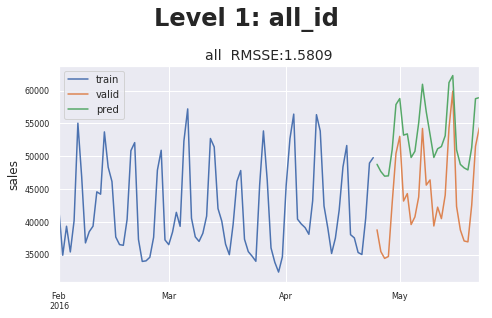


Nguồn: [Discussion](https://www.kaggle.com/competitions/m5-forecasting-accuracy/discussion/164599) của tác giả

- Tác giả đã sử dụng phương pháp ở [discussion](https://www.kaggle.com/c/m5-forecasting-accuracy/discussion/140564) này nhằm giải quyết việc căn chỉnh. Thông qua hyperparameter ở code LGBM là LOSS_MULTIPLIER 

Và tác giả đã dùng cách để điều chỉnh dự đoán đó sao cho 'khớp' với thực tế hơn như ảnh dưới:


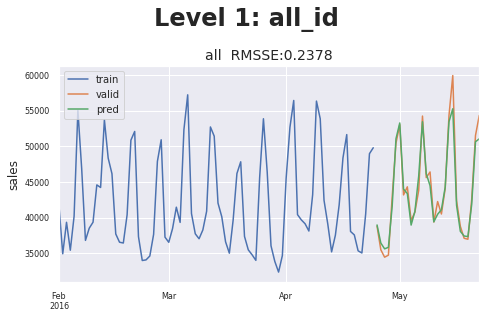

Nguồn: [Discussion](https://www.kaggle.com/competitions/m5-forecasting-accuracy/discussion/164599) của tác giả

- Cuối cùng là với lgbm dự đoán từng sản phẩm một thì tác giả tổng hợp ngược lại lên level id cao hơn để cho ra tổng sale mà sản phẩm bán được theo từng khu vực như All(Tất cả), CA-1, CA-2,... Và so sánh với NBeats cùng từng khu vực tương ứng.


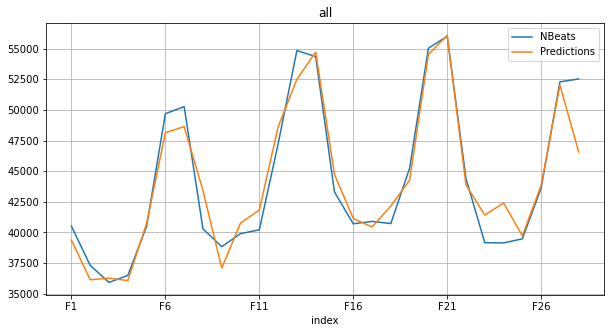


Nguồn: [Discussion](https://www.kaggle.com/competitions/m5-forecasting-accuracy/discussion/164599) của tác giả

### Nhận định của nhóm

- Việc lựa chọn thì tác giả không đề cập là tại sao lại dự đoán hai kiểu dự toán tổng 'sale' và 'sale' từng mặt hàng. Nhóm có giả thuyết như sau:
  *  LGBM dựa đoán 'sale' từng mặt hàng nhằm mục đích cho việc tìm ra RMSSE phù hợp nhất
  * Tiếp đến là NBEATS dự đoán tổng 'sales'nhằm mục đích căn chỉnh cho việc tính toán WRMSSE là kết quả xếp hạng cuối cùng. Vì công thức mà cuộc thi đưa ra có liên quan tới việc trọng số tính từ tổng 'sales'. Thông qua code của tác giả thì nhóm thấy tác giả có xây dựng được một evaluator có tham số 'wrmsse' nên có thể tác giả đã mô phỏng lại được cách tính toán của ban tổ chức và điều chỉnh hyperparameter sao cho đạt được WRMSSE mong muốn và lấy đó làm nền tảng nhằm điều chỉnh LGBM.

## 4. Mô hình LGBM

### Giới thiệu LGBM

LightGBM là một FrameWork để xử lý thuật toán tăng cường độ dốc (Gradient Boosting) được phát triển bởi Microsoft. Gradient Boosting là một thuật toán xuất phát từ thuật toán Cây quyết định (Decision Tree), nó thực hiện việc xây dựng tuần tự nhiều Cây quyết định và tiến hành học tập.

LightGBM có nhiều ưu điểm của XGBoost , bao gồm tối ưu hóa sparse, training song song, nhiều loss functions, regularization, bagging và early stopping. Một sự khác biệt chính giữa cả hai nằm ở việc xây dựng cây cấu trúc. LightGBM không phát triển theo cấp độ cây - từng hàng - như hầu hết các triển khai khác.Thay vào đó, nó mọc các loại cây có lá. Nó chọn chiếc lá mà nó tin rằng sẽ giúp giảm sai số nhiều nhất.

Tài liệu tham khảo:

 - https://qiita.com/ngomanh/items/b5e8aa6f1de16ea31e89
 - https://en.wikipedia.org/wiki/LightGBM

Minh họa sự khác biệt của lgbm và xgboost.

+ XGBoost:

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/11194110/leaf.png'>


+ LGBM: 

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/11194227/depth.png'>


Nguồn: https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/

### Code sử dụng LGBM

In [ ]:
# General imports
import numpy as np
import pandas as pd
import os, sys, gc, time, warnings, pickle, psutil, random

# custom imports
from multiprocessing import Pool        # Multiprocess Runs

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
########################### Helpers
#################################################################################
## Seeder
# :seed to make all processes deterministic     # type: int
def seed_everything(seed=0):
    random.seed(seed)
    np.random.seed(seed)

In [ ]:
LOSS_MULTIPLIER = 0.93

In [ ]:
# define custom loss function
def custom_asymmetric_train(y_pred, y_true):
    y_true = y_true.get_label()
    residual = (y_true - y_pred).astype("float")
    grad = np.where(residual < 0, -2 * residual, -2 * residual * LOSS_MULTIPLIER)
    hess = np.where(residual < 0, 2, 2 * LOSS_MULTIPLIER)
    return grad, hess

# define custom evaluation metric
def custom_asymmetric_valid(y_pred, y_true):
    y_true = y_true.get_label()
    residual = (y_true - y_pred).astype("float")
    loss = np.where(residual < 0, (residual ** 2) , (residual ** 2) * LOSS_MULTIPLIER) 
    return "custom_asymmetric_eval", np.mean(loss), False

In [ ]:
########################### Helper to load data by store ID
#################################################################################
# Read data
def get_data_by_store(store):
    
    # Read and contact basic feature
    df = pd.concat([pd.read_pickle(BASE),
                    pd.read_pickle(PRICE).iloc[:,2:],
                    pd.read_pickle(CALENDAR).iloc[:,2:]],
                    axis=1)
    
    # Leave only relevant store
    df = df[df['store_id']==store]

    
    ##### TESTING HYPOTHESIS - remove all rolling and lag features ...
    
    keep_cols = [col for col in list(df) if 'sales_lag' not in col]
    df = df[keep_cols]
    keep_cols = [col for col in list(df) if 'rolling' not in col]
    df = df[keep_cols]
    
    ############
    
    # Create features list
    features = [col for col in list(df) if col not in remove_features]
    df = df[['id','d',TARGET]+features]
    
    # Skipping first n rows
    df = df[df['d']>=START_TRAIN].reset_index(drop=True)
    
    return df, features

# Recombine Test set after training
def get_base_test():
    base_test = pd.DataFrame()

    for store_id in STORES_IDS:
        temp_df = pd.read_pickle('test_'+store_id+'.pkl')
        temp_df['store_id'] = store_id
        base_test = pd.concat([base_test, temp_df]).reset_index(drop=True)
    
    return base_test

In [ ]:
########################### Model params
#################################################################################
import lightgbm as lgb
lgb_params = {
        'boosting_type': 'gbdt',
        'objective': 'tweedie',
        'tweedie_variance_power': 1.1,
        'metric':'rmse',
        'n_jobs': -1,
        'seed': 42,
        'learning_rate': 0.2,
        'bagging_fraction': 0.85,
        'bagging_freq': 1, 
        'colsample_bytree': 0.85,
        'colsample_bynode': 0.85,
        #'min_data_per_leaf': 25,
        #'num_leaves': 200,
        'lambda_l1': 0.5,
        'lambda_l2': 0.5
}

In [ ]:
########################### Vars
#################################################################################
VER = 1                          # Our model version
SEED = 42                        # We want all things
seed_everything(SEED)            # to be as deterministic 
lgb_params['seed'] = SEED        # as possible
N_CORES = psutil.cpu_count()     # Available CPU cores


#LIMITS and const
TARGET      = 'sales'            # Our target
START_TRAIN = 0                  # We can skip some rows (Nans/faster training)
END_TRAIN   = 1913+28               # End day of our train set
P_HORIZON   = 28                 # Prediction horizon
USE_AUX     = False               # Use or not pretrained models

#FEATURES to remove
## These features lead to overfit
## or values not present in test set
remove_features = ['id','state_id','store_id',
                   'date','wm_yr_wk','d',TARGET]

#PATHS for Features
ORIGINAL = '../input/m5-forecasting-accuracy/'
BASE     = '../input/m5-simple-fe-evaluation/grid_part_1.pkl'
PRICE    = '../input/m5-simple-fe-evaluation/grid_part_2.pkl'
CALENDAR = '../input/m5-simple-fe-evaluation/grid_part_3.pkl'

#STORES ids
STORES_IDS = pd.read_csv(ORIGINAL+'sales_train_validation.csv')['store_id']
STORES_IDS = list(STORES_IDS.unique())

In [ ]:
########################### Train Models
#################################################################################
for store_id in STORES_IDS:
    print('Train', store_id)
    
    # Get grid for current store
    grid_df, features_columns = get_data_by_store(store_id)
    
    # Masks for 
    # Train (All data less than 1913)
    # "Validation" (Last 28 days - not real validatio set)
    # Test (All data greater than 1913 day, 
    #       with some gap for recursive features)
    train_mask = grid_df['d']<=END_TRAIN
    valid_mask = train_mask&(grid_df['d']>(END_TRAIN-P_HORIZON))
    preds_mask = grid_df['d']>(END_TRAIN-100)
    
    # Apply masks and save lgb dataset as bin
    # to reduce memory spikes during dtype convertations
    # https://github.com/Microsoft/LightGBM/issues/1032
    # "To avoid any conversions, you should always use np.float32"
    # or save to bin before start training
    # https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/discussion/53773
    train_data = lgb.Dataset(grid_df[train_mask][features_columns], 
                       label=grid_df[train_mask][TARGET])
    train_data.save_binary('train_data.bin')
    train_data = lgb.Dataset('train_data.bin')
    
    valid_data = lgb.Dataset(grid_df[valid_mask][features_columns], 
                       label=grid_df[valid_mask][TARGET])
    
    # Saving part of the dataset for later predictions
    # Removing features that we need to calculate recursively 
    grid_df = grid_df[preds_mask].reset_index(drop=True)
    keep_cols = [col for col in list(grid_df) if '_tmp_' not in col]
    grid_df = grid_df[keep_cols]
    grid_df.to_pickle('test_'+store_id+'.pkl')
    del grid_df
    
    # Launch seeder again to make lgb training 100% deterministic
    # with each "code line" np.random "evolves" 
    # so we need (may want) to "reset" it
    seed_everything(SEED)
    estimator = lgb.train(lgb_params,
                          train_data,
                          num_boost_round = 3600, 
                          early_stopping_rounds = 50, 
                          valid_sets = [train_data, valid_data],
                          verbose_eval = 100,
                          fobj = custom_asymmetric_train

                          )
    
    # Save model - it's not real '.bin' but a pickle file
    # estimator = lgb.Booster(model_file='model.txt')
    # can only predict with the best iteration (or the saving iteration)
    # pickle.dump gives us more flexibility
    # like estimator.predict(TEST, num_iteration=100)
    # num_iteration - number of iteration want to predict with, 
    # NULL or <= 0 means use best iteration
    model_name = 'lgb_model_'+store_id+'_v'+str(VER)+'.bin'
    pickle.dump(estimator, open(model_name, 'wb'))

    # Remove temporary files and objects 
    # to free some hdd space and ram memory
    !rm train_data.bin
    del train_data, valid_data, estimator
    gc.collect()
    
    # "Keep" models features for predictions
    MODEL_FEATURES = features_columns

In [ ]:
########################### Predict
#################################################################################

# Create Dummy DataFrame to store predictions
all_preds = pd.DataFrame()

# Join back the Test dataset with 
# a small part of the training data 
# to make recursive features
base_test = get_base_test()

# Timer to measure predictions time 
main_time = time.time()

# Loop over each prediction day
# As rolling lags are the most timeconsuming
# we will calculate it for whole day
for PREDICT_DAY in range(1,29):    
    print('Predict | Day:', PREDICT_DAY)
    start_time = time.time()

    # Make temporary grid to calculate rolling lags
    grid_df = base_test.copy()
        
    for store_id in STORES_IDS:
        
        # Read all our models and make predictions
        # for each day/store pairs
        model_path = 'lgb_model_'+store_id+'_v'+str(VER)+'.bin' 
        if USE_AUX:
            model_path = AUX_MODELS + model_path
        
        estimator = pickle.load(open(model_path, 'rb'))
        
        day_mask = base_test['d']==(END_TRAIN+PREDICT_DAY)
        store_mask = base_test['store_id']==store_id
        
        mask = (day_mask)&(store_mask)
        base_test[TARGET][mask] = estimator.predict(grid_df[mask][MODEL_FEATURES])
    
    # Make good column naming and add 
    # to all_preds DataFrame
    temp_df = base_test[day_mask][['id',TARGET]]
    temp_df.columns = ['id','F'+str(PREDICT_DAY)]
    if 'id' in list(all_preds):
        all_preds = all_preds.merge(temp_df, on=['id'], how='left')
    else:
        all_preds = temp_df.copy()
        
    print('#'*10, ' %0.2f min round |' % ((time.time() - start_time) / 60),
                  ' %0.2f min total |' % ((time.time() - main_time) / 60),
                  ' %0.2f day sales |' % (temp_df['F'+str(PREDICT_DAY)].sum()))
    del temp_df
    
all_preds = all_preds.reset_index(drop=True)
all_preds

In [ ]:
########################### Export
#################################################################################
# Reading competition sample submission and
# merging our predictions
# As we have predictions only for "_validation" data
# we need to do fillna() for "_evaluation" items
submission = pd.read_csv(ORIGINAL+'sample_submission.csv')[['id']]
submission = submission.merge(all_preds, on=['id'], how='left').fillna(0)
submission.to_csv('submission_v'+str(VER)+'.csv', index=False)

## 5. Mô hình N-BEATS

### Giới thiệu N-BEATS

N-BEATS (Neural Basic Expansion Analysis for interpretable Time Series forecasting) là một mô hình Deep Learning thuần tuý phục vụ cho dự đoán những bài toán mang tính Time Series. Trong cuộc thi M4, mô hình ES-RNN (Exponential Smoothing Recurrent Neural Network) là mô hình giành giải nhất với kết quả tốt nhất. Nhưng sau khi người ta thử lại với N-BEATS thì kết quả lại tốt hơn đến 3%.

N-BEATS sử dụng kiến trúc gồm tập hợp các feed-forward networks cùng với các residual blocks cho dự đoán và dự đoán lại. Các residual blocks này bao gồm các layer được ghép lại với nhau (DenseNet) hoặc là thêm dữ liệu đầu vào ban đầu vào dữ liệu đầu ra của từng layer (ResNet), sử dụng việc bỏ qua kết nối (skip connections) để quyết định xem layer hiện tại có hữu dụng hay không.

N-BEATS sử dụng việc bỏ qua kết nối này theo nhiều cách khác nhau, phục vụ cho việc giúp công việc ở layer tiếp theo trở nên nhẹ nhàng hơn bằng cách loại bỏ kết quả của dự đoán lại khỏi dữ liệu đầu vào của layer. Đồng thời, mỗi khối đều có kết quả dự đoán nhỏ, sẽ được thêm vào dự đoán của layer tiếp theo trong block để cho kết quả dự đoán tốt hơn.

Bên cạnh đó, N-BEATS còn hỗ trợ cho việc phân tích dữ liệu theo xu hướng (Trend) và theo mùa (Seasonal), giúp cho kết quả thu được trở nên thực tế hơn. Và với sự kết hợp nhiều mô hình với dữ liệu đầu vào có độ lớn khác nhau giúp việc chuẩn hoá (regularizing) trở nên tốt hơn, trả về kết quả có độ chính xác cao hơn.

Tài liệu tham khảo:
- https://towardsdatascience.com/n-beats-unleashed-deep-forecasting-using-neural-basis-expansion-analysis-in-python-343dd6307010
- https://towardsdatascience.com/n-beats-beating-statistical-models-with-neural-nets-28a4ba4a4de8
- https://arxiv.org/abs/1905.10437

<img src='https://miro.medium.com/max/836/1*1If8JU4JwFAta1kjMjkTQg.png'>


Nguồn: https://kshavg.medium.com/n-beats-neural-basis-expansion-analysis-for-interpretable-time-series-forecasting-91e94c830393

### Code sử dụng N-BEATS

Đầu tiên tác giả build tập dữ liệu top 5 level đầu tiên:

1.   All products, all stores, all states (1 series)
2.   All products by state (3 series)
3.   All products by store (10 series)
4.   All products by category (3 series)
5.   All products by department (7 series)

Sau đó kết hợp lại làm bảng dữ liệu thống nhất làm dữ liệu đầu vào cho NBEATS.

 Ở đây tác giả sử dụng thư viện gluonts (có chỉnh sửa so với thư viện gốc) đã có sẵn model Nbeat để sử dụng. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [35]:
import sys
#package_path = '/content/drive/My Drive/m5data/deepar' 
#sys.path.append(package_path)

package_path = '/content/drive/MyDrive/M5-Forecasting-Accuracy-data/' 
sys.path.append(package_path)

#package_path = '/content/drive/My Drive/m5data/aggregates' 
#sys.path.append(package_path)


###### IF NOT RUN ON COLAB YOU HAVE TO MAKE SURE THAT GLUONTS PACKAGE IS IN YOUR PATH

In [ ]:
#!pip install pydantic~=1.1 ujson~=1.35
#!pip install --upgrade mxnet-cu101mkl==1.4.1 gluonts --no-deps
!pip install --upgrade pydantic ujson mxnet-cu101mkl==1.4.1 --no-deps

#!pip install --upgrade pydantic ujson mxnet-cu101mkl --no-deps

!pip uninstall -y gluonts

In [ ]:
%matplotlib inline
import mxnet as mx
from mxnet import gluon
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from tqdm.autonotebook import tqdm
from pathlib import Path

In [ ]:
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.trainer import Trainer
from gluonts.model.n_beats import NBEATSEnsembleEstimator
from gluonts.evaluation import Evaluator

In [ ]:
class M5Evaluator(Evaluator):
          
        def get_metrics_per_ts(self, time_series, forecast):
              successive_diff = np.diff(time_series.values.reshape(len(time_series)))
              successive_diff = successive_diff ** 2
              successive_diff = successive_diff[:-prediction_length]
              denom = np.mean(successive_diff)
              pred_values = forecast.samples.mean(axis=0)
              true_values = time_series.values.reshape(len(time_series))[-prediction_length:]
              num = np.mean((pred_values - true_values)**2)
              rmsse = num / denom
              metrics = super().get_metrics_per_ts(time_series, forecast)
              metrics["RMSSE"] = rmsse
              return metrics
          
        def get_aggregate_metrics(self, metric_per_ts):
              wrmsse = metric_per_ts["RMSSE"].mean()
              agg_metric , _ = super().get_aggregate_metrics(metric_per_ts)
              agg_metric["MRMSSE"] = wrmsse
              return agg_metric, metric_per_ts

In [ ]:
from gluonts.dataset.common import load_datasets, ListDataset
from gluonts.dataset.field_names import FieldName

In [41]:
single_prediction_length = 28
submission_prediction_length = single_prediction_length * 2
m5_input_path="/content/drive/MyDrive/M5-Forecasting-Accuracy-data"

SUBMISSION=True
VISUALIZE=True

VERSION=2

CALC_RESIDUALS = False

#if SUBMISSION:
#    prediction_length = submission_prediction_length
#else:
#    prediction_length = single_prediction_length


prediction_length = single_prediction_length

In [42]:
# Seed value
seed_value= 247

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set gluon seed...
mx.random.seed(seed_value)

In [43]:
# Load data
print('Loading data...')
sell_price = pd.read_csv('%s/sell_prices.csv' % m5_input_path)
calendar = pd.read_csv('%s/calendar.csv' % m5_input_path)
train = pd.read_csv('%s/sales_train_evaluation.csv' % m5_input_path).set_index('id')
sample_sub = pd.read_csv('%s/sample_submission.csv' % m5_input_path)

Loading data...


In [44]:
# Get column groups
cat_cols = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
ts_cols = [col for col in train.columns if col not in cat_cols]
ts_dict = {t: int(t[2:]) for t in ts_cols}

# Describe data
print('  unique forecasts: %i' % train.shape[0])
for col in cat_cols:
    print('   N_unique %s: %i' % (col, train[col].nunique()))

  unique forecasts: 30490
   N_unique item_id: 3049
   N_unique dept_id: 7
   N_unique cat_id: 3
   N_unique store_id: 10
   N_unique state_id: 3


In [45]:
%%time
# 1. All products, all stores, all states (1 series)
all_sales = pd.DataFrame(train[ts_cols].sum()).transpose()
all_sales['id_str'] = 'all'
all_sales = all_sales[ ['id_str'] +  [c for c in all_sales if c not in ['id_str']] ]

CPU times: user 217 ms, sys: 1.46 ms, total: 218 ms
Wall time: 383 ms


In [46]:
%%time
# 2. All products by state (3 series)
state_sales = train.groupby('state_id',as_index=False)[ts_cols].sum()
state_sales['id_str'] = state_sales['state_id'] 
state_sales = state_sales[ ['id_str'] +  [c for c in state_sales if c not in ['id_str']] ]
state_sales = state_sales.drop(['state_id'],axis=1)

CPU times: user 1.41 s, sys: 494 ms, total: 1.91 s
Wall time: 2.98 s


In [47]:
%%time
# 3. All products by store (10 series)
store_sales = train.groupby('store_id',as_index=False)[ts_cols].sum()
store_sales['id_str'] = store_sales['store_id'] 
store_sales = store_sales[ ['id_str'] +  [c for c in store_sales if c not in ['id_str']] ]
store_sales = store_sales.drop(['store_id'],axis=1)

CPU times: user 1.04 s, sys: 1.68 ms, total: 1.04 s
Wall time: 1.59 s


In [48]:
%%time
# 4. All products by category (3 series)
cat_sales = train.groupby('cat_id',as_index=False)[ts_cols].sum()
cat_sales['id_str'] = cat_sales['cat_id'] 
cat_sales = cat_sales[ ['id_str'] +  [c for c in cat_sales if c not in ['id_str']] ]
cat_sales = cat_sales.drop(['cat_id'],axis=1)

CPU times: user 1.04 s, sys: 0 ns, total: 1.04 s
Wall time: 1.57 s


In [49]:
%%time
# 5. All products by department (7 series)
dept_sales = train.groupby('dept_id',as_index=False)[ts_cols].sum()
dept_sales['id_str'] = dept_sales['dept_id'] 
dept_sales = dept_sales[ ['id_str'] +  [c for c in dept_sales if c not in ['id_str']] ]
dept_sales = dept_sales.drop(['dept_id'],axis=1)

CPU times: user 1.04 s, sys: 2.73 ms, total: 1.04 s
Wall time: 1.24 s


In [50]:
all_aggregates = pd.concat([all_sales,state_sales,store_sales,cat_sales,dept_sales],ignore_index=True)

In [51]:
all_aggregates

,id_str,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,all,32631,31749,23783,25412,19146,29211,28010,37932,32736,...,44073,54308,59921,42362,38777,37096,36963,42552,51518,54338
1,CA,14195,13805,10108,11047,9925,11322,12251,16610,14696,...,18471,23037,24704,17721,16150,15678,16297,17430,23103,24644
2,TX,9438,9630,6778,7381,5912,9006,6226,9440,9376,...,12320,12366,16249,12228,11370,10375,9162,12303,13681,14815
3,WI,8998,8314,6897,6984,3309,8883,9533,11882,8664,...,13282,18905,18968,12413,11257,11043,11504,12819,14734,14879
4,CA_1,4337,4155,2816,3051,2630,3276,3450,5437,4340,...,4951,6245,6707,4568,3949,3995,4136,4433,5764,6289
5,CA_2,3494,3046,2121,2324,1942,2288,2629,3729,2957,...,4839,6507,6710,4238,3963,3789,4037,4751,7120,6614
6,CA_3,4739,4827,3785,4232,3817,4369,4703,5456,5581,...,6046,7029,7969,5891,5523,5375,5580,5542,7073,8144
7,CA_4,1625,1777,1386,1440,1536,1389,1469,1988,1818,...,2635,3256,3318,3024,2715,2519,2544,2704,3146,3597
8,TX_1,2556,2687,1822,2258,1694,2734,1691,2820,2887,...,3610,3787,5000,3708,3310,3147,2748,3664,4167,4624
9,TX_2,3852,3937,2731,2954,2492,3439,2588,3772,3657,...,4415,4424,5866,4179,4008,3518,3126,4249,4802,5217


In [ ]:
train_df = all_aggregates.drop(["id_str"], axis=1)
train_target_values = train_df.values

if SUBMISSION == True:
    test_target_values = [np.append(ts, np.ones(prediction_length) * np.nan) for ts in train_df.values]
else:
    test_target_values = train_target_values.copy()
    train_target_values = [ts[:-prediction_length] for ts in train_df.values]

m5_dates = [pd.Timestamp("2011-01-29", freq='1D') for _ in range(len(all_aggregates))]

train_ds = ListDataset([
      {
          FieldName.TARGET: target,
          FieldName.START: start
      }
      for (target, start) in zip(train_target_values,
                                          m5_dates
                                          )
  ], freq="D")

test_ds = ListDataset([
      {
          FieldName.TARGET: target,
          FieldName.START: start
      }
      for (target, start) in zip(test_target_values,
                                          m5_dates)
  ], freq="D")

In [ ]:
next(iter(train_ds))

In [ ]:
'''
if True: #version 1

  estimator = NBEATSEnsembleEstimator(
      prediction_length=prediction_length,
      #context_length=7*prediction_length,
      meta_bagging_size = 1,  # 3, ## Change back to 10 after testing??
      meta_context_length = [prediction_length * mlp for mlp in [3,5] ], ## Change back to (2,7) // 3,5,7
      meta_loss_function = ['sMAPE', 'MASE'], ## Change back to all three MAPE, MASE ...
      freq="D",
      trainer=Trainer(
                    learning_rate=1e-3,
                    #clip_gradient=1.0,
                    epochs=15, #10
                    num_batches_per_epoch=1000,
                    batch_size=16
                    #ctx=mx.context.gpu()
                )

  )
'''


if True: # Version 2

  estimator = NBEATSEnsembleEstimator(
      prediction_length=prediction_length,
      #context_length=7*prediction_length,
      meta_bagging_size = 3,  # 3, ## Change back to 10 after testing??
      meta_context_length = [prediction_length * mlp for mlp in [3,5,7] ], ## Change back to (2,7) // 3,5,7
      meta_loss_function = ['sMAPE'], ## Change back to all three MAPE, MASE ...
      num_stacks = 30,
      widths= [512],
      freq="D",
      trainer=Trainer(
                    learning_rate=6e-4,
                    #clip_gradient=1.0,
                    epochs=12, #10
                    num_batches_per_epoch=1000,
                    batch_size=16
                    #ctx=mx.context.gpu()
                )

  )

In [ ]:

if SUBMISSION:
  predictor = estimator.train(train_ds)
else:
  predictor = estimator.train(train_ds,test_ds)

In [ ]:
  # version 2
  forecast_it, ts_it = make_evaluation_predictions(
      dataset=test_ds,
      predictor=predictor,
      num_samples=100
  )

  print("Obtaining time series conditioning values ...")
  tss = list(tqdm(ts_it, total=len(test_ds)))
  print("Obtaining time series predictions ...")
  forecasts = list(tqdm(forecast_it, total=len(test_ds)))

In [ ]:
if not SUBMISSION:
      evaluator = M5Evaluator(quantiles=[0.5, 0.67, 0.95, 0.99])
      agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_ds))
      print(json.dumps(agg_metrics, indent=4))

In [ ]:
num_series = len(all_aggregates)

In [ ]:
if VISUALIZE:
  
  plot_log_path = "./plots/"
  directory = os.path.dirname(plot_log_path)
  if not os.path.exists(directory):
      os.makedirs(directory)
      
  def plot_prob_forecasts(ts_entry, forecast_entry, path, sample_id, inline=True):
      plot_length = 150
      prediction_intervals = (50, 99)
      legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

      _, ax = plt.subplots(1, 1, figsize=(10, 7))
      ts_entry[-plot_length:].plot(ax=ax)
      forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
      ax.axvline(ts_entry.index[-prediction_length], color='r')
      plt.legend(legend, loc="upper left")
      if inline:
          plt.show()
          plt.clf()
      else:
          plt.savefig('{}forecast_{}.pdf'.format(path, sample_id))
          plt.close()

  print("Plotting time series predictions ...")
  for i in tqdm(range(num_series)):
      ts_entry = tss[i]
      forecast_entry = forecasts[i]
      plot_prob_forecasts(ts_entry, forecast_entry, plot_log_path, i)

In [ ]:
forecasts_acc = np.zeros((len(forecasts), prediction_length))

for i in range(len(forecasts)):
    forecasts_acc[i] = forecasts[i].samples

columns = []
for i in range(1,(forecasts_acc.shape[1]+1)):
    columns.append("F"+str(i))
forecasts_acc_df = pd.DataFrame(data=forecasts_acc, columns=columns)

In [ ]:
forecasts_acc_df = pd.concat([all_aggregates['id_str'],forecasts_acc_df],axis=1)

In [ ]:
forecasts_acc_df

In [ ]:
forecasts_acc_df.to_csv('/content/nbeats_toplvl_forecasts{}.csv'.format(VERSION), index=False)

## Kết quả cuối cùng

### Code thực hiện

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.simplefilter(action='ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load NBEATS reference predictions for global alignment
NBeats predictions trained and predicted on Colab with two different settings (only change in setting is num_epochs to get slightly different ensembles)**

In [4]:
nbeats_pred01_df = pd.read_csv('/content/drive/MyDrive/M5-Forecasting-Accuracy-data/nbeats_toplvl_forecasts1.csv')
nbeats_pred02_df = pd.read_csv('/content/drive/MyDrive/M5-Forecasting-Accuracy-data/nbeats_toplvl_forecasts2.csv')

#nbeats_pred_df.head()

**Load bottom level lgb predictions for alignment**

In [5]:
BUILD_ENSEMBLE = True

In [6]:
if BUILD_ENSEMBLE:
    
    #pred_01_df = pd.read_csv('/content/drive/MyDrive/M5-Forecasting-Accuracy-data/submission_v90.csv')
    #pred_02_df = pd.read_csv('/content/drive/MyDrive/M5-Forecasting-Accuracy-data/submission_v93.csv')
    pred_03_df = pd.read_csv('/content/drive/MyDrive/M5-Forecasting-Accuracy-data/submission_v95.csv')
    #pred_04_df = pd.read_csv('/content/drive/MyDrive/M5-Forecasting-Accuracy-data/submission_v97.csv')
    #pred_05_df = pd.read_csv('/content/drive/MyDrive/M5-Forecasting-Accuracy-data/submission_v99.csv')
    #pred_06_df = pd.read_csv('..')

    #avg_pred = ( np.array(pred_01_df.values[:,1:]) 
    #            + np.array(pred_02_df.values[:,1:]) 
    #            + np.array(pred_03_df.values[:,1:])
    #            + np.array(pred_04_df.values[:,1:])  
    #            + np.array(pred_05_df.values[:,1:])  
    #           # + np.array(pred_06_df.values[:,1:])  
    #           ) / 5.0
    avg_pred = np.array(pred_03_df.values[:,1:])
    ## Loading predictions
    valid_pred_df = pd.DataFrame(avg_pred, columns=pred_03_df.columns[1:])
    submission_pred_df = pd.concat([pred_03_df['id'],valid_pred_df],axis=1)
    
else:
    print('Should not submit single distibution')
    #submission_pred_df = pd.read_csv('../input/m5-final-13/submission_v1.csv')

In [7]:
submission_pred_df

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,HOBBIES_1_002_CA_1_validation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,HOBBIES_1_003_CA_1_validation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,HOBBIES_1_004_CA_1_validation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HOBBIES_1_005_CA_1_validation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0.267983,0.202819,0.180995,0.158913,0.196523,0.316022,0.329084,0.265166,0.203345,...,0.303824,0.482868,0.528682,0.373612,0.380386,0.395043,0.299744,0.2637,0.397206,0.404674
60976,FOODS_3_824_WI_3_evaluation,0.207812,0.142648,0.111921,0.089839,0.135425,0.289916,0.287127,0.604433,0.159269,...,0.250431,0.47974,0.505008,0.321146,0.343193,0.348946,0.238376,0.210307,0.378806,0.287079
60977,FOODS_3_825_WI_3_evaluation,0.704383,0.639219,0.605289,0.583208,0.612175,0.801702,0.819458,0.674752,0.636543,...,0.887772,1.221664,1.285441,0.978228,1.036718,1.036688,0.871191,0.826505,1.030039,1.073021
60978,FOODS_3_826_WI_3_evaluation,0.800055,0.734891,0.708476,0.656875,0.695187,0.868271,0.808028,0.763342,0.756691,...,0.829978,1.10129,1.08514,0.890115,0.910455,0.915164,0.825196,0.789854,0.961186,1.001409


**Fill validation rows - we have no info about validation scoring**
- Even though it would not make sense at all to score public validation data it might be safest to set the submission validation values to the ground truth....

- Spamming the LB a bit more ...

In [8]:
validation_gt_data = pd.read_csv('/content/drive/MyDrive/M5-Forecasting-Accuracy-data/sales_train_evaluation.csv')
validation_gt_data

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [9]:

validation_gt_data['id'] = validation_gt_data['id'].str.replace('_evaluation','_validation')
validation_gt_data = validation_gt_data.drop(['item_id','dept_id','cat_id','store_id','state_id'],axis=1)
validation_gt_data = pd.concat([validation_gt_data[['id']],validation_gt_data.iloc[:,-28:]],axis=1)
validation_gt_data.columns=submission_pred_df.columns.values
validation_gt_data

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,2,0,3,5,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_validation,0,1,0,0,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,1,1,0,2,1,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_validation,0,0,1,2,4,1,6,4,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_validation,1,0,2,3,1,0,3,2,3,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,0,0,0,2,2,0,0,0,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_validation,0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_validation,0,0,1,1,0,2,1,1,0,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_validation,1,3,0,1,2,1,0,2,1,...,1,1,1,4,6,0,1,1,1,0


In [10]:
submission_pred_df = pd.concat([validation_gt_data, submission_pred_df.iloc[30490:,:]],axis=0).reset_index(drop=True)
submission_pred_df

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,2,0,3,5,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_validation,0,1,0,0,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,1,1,0,2,1,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_validation,0,0,1,2,4,1,6,4,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_validation,1,0,2,3,1,0,3,2,3,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0.267983,0.202819,0.180995,0.158913,0.196523,0.316022,0.329084,0.265166,0.203345,...,0.303824,0.482868,0.528682,0.373612,0.380386,0.395043,0.299744,0.2637,0.397206,0.404674
60976,FOODS_3_824_WI_3_evaluation,0.207812,0.142648,0.111921,0.089839,0.135425,0.289916,0.287127,0.604433,0.159269,...,0.250431,0.47974,0.505008,0.321146,0.343193,0.348946,0.238376,0.210307,0.378806,0.287079
60977,FOODS_3_825_WI_3_evaluation,0.704383,0.639219,0.605289,0.583208,0.612175,0.801702,0.819458,0.674752,0.636543,...,0.887772,1.221664,1.285441,0.978228,1.036718,1.036688,0.871191,0.826505,1.030039,1.073021
60978,FOODS_3_826_WI_3_evaluation,0.800055,0.734891,0.708476,0.656875,0.695187,0.868271,0.808028,0.763342,0.756691,...,0.829978,1.10129,1.08514,0.890115,0.910455,0.915164,0.825196,0.789854,0.961186,1.001409


In [11]:
bottom_lvl_pred_df = submission_pred_df.iloc[30491:,:].reset_index(drop=True)
bottom_lvl_pred_df

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_002_CA_1_evaluation,0.274057,0.198213,0.193743,0.200575,0.302682,0.389908,0.384188,0.335218,0.259293,...,0.332506,0.38819,0.391588,0.280441,0.217615,0.218165,0.23232,0.338739,0.417769,0.361457
1,HOBBIES_1_003_CA_1_evaluation,0.344185,0.268417,0.263947,0.270779,0.372886,0.466861,0.454028,0.39961,0.329497,...,0.40271,0.465143,0.461429,0.350569,0.287819,0.288369,0.302523,0.408943,0.494722,0.437559
2,HOBBIES_1_004_CA_1_evaluation,1.644394,1.568526,1.564873,1.56956,1.662344,2.451899,2.677667,2.672542,1.63272,...,1.737826,2.55162,2.781539,1.657327,1.594477,1.595028,1.604684,1.697468,2.754858,2.981104
3,HOBBIES_1_005_CA_1_evaluation,1.063142,1.001539,0.99707,1.003902,1.165586,1.293679,1.279773,1.178803,1.073119,...,1.110793,1.30483,1.25952,1.061281,0.998531,1.012341,1.021997,1.182752,1.302648,1.20358
4,HOBBIES_1_006_CA_1_evaluation,0.552808,0.519155,0.523171,0.539123,0.536702,0.582474,0.77531,1.160949,1.487353,...,0.513761,0.695936,0.733427,0.669354,0.651517,0.664454,0.684352,0.718,0.755575,0.913044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30484,FOODS_3_823_WI_3_evaluation,0.267983,0.202819,0.180995,0.158913,0.196523,0.316022,0.329084,0.265166,0.203345,...,0.303824,0.482868,0.528682,0.373612,0.380386,0.395043,0.299744,0.2637,0.397206,0.404674
30485,FOODS_3_824_WI_3_evaluation,0.207812,0.142648,0.111921,0.089839,0.135425,0.289916,0.287127,0.604433,0.159269,...,0.250431,0.47974,0.505008,0.321146,0.343193,0.348946,0.238376,0.210307,0.378806,0.287079
30486,FOODS_3_825_WI_3_evaluation,0.704383,0.639219,0.605289,0.583208,0.612175,0.801702,0.819458,0.674752,0.636543,...,0.887772,1.221664,1.285441,0.978228,1.036718,1.036688,0.871191,0.826505,1.030039,1.073021
30487,FOODS_3_826_WI_3_evaluation,0.800055,0.734891,0.708476,0.656875,0.695187,0.868271,0.808028,0.763342,0.756691,...,0.829978,1.10129,1.08514,0.890115,0.910455,0.915164,0.825196,0.789854,0.961186,1.001409


**Reconstruct level descriptions for aggregation**

In [12]:
name_cols = bottom_lvl_pred_df.id.str.split(pat='_',expand=True)
name_cols['dept_id']=name_cols[0]+'_'+name_cols[1]
name_cols['store_id']=name_cols[3]+'_'+name_cols[4]
name_cols = name_cols.rename(columns={0: "cat_id", 3: "state_id"})
name_cols = name_cols.drop([1,2,4,5],axis=1)
bottom_lvl_pred_df = pd.concat([name_cols,bottom_lvl_pred_df],axis=1)

**Build aggregates of predictions**

In [13]:
# Get column groups
cat_cols = ['id', 'dept_id', 'cat_id',  'store_id', 'state_id']
ts_cols = [col for col in bottom_lvl_pred_df.columns if col not in cat_cols]
ts_dict = {t: int(t[1:]) for t in ts_cols}

# Describe data
print('  unique forecasts: %i' % bottom_lvl_pred_df.shape[0])
for col in cat_cols:
    print('   N_unique %s: %i' % (col, bottom_lvl_pred_df[col].nunique()))

  unique forecasts: 30489
   N_unique id: 30489
   N_unique dept_id: 7
   N_unique cat_id: 3
   N_unique store_id: 10
   N_unique state_id: 3


In [14]:
# 1. All products, all stores, all states (1 series)
all_sales = pd.DataFrame(bottom_lvl_pred_df[ts_cols].sum()).transpose()
all_sales['id_str'] = 'all'
all_sales = all_sales[ ['id_str'] +  [c for c in all_sales if c not in ['id_str']] ]


# 2. All products by state (3 series)
state_sales = bottom_lvl_pred_df.groupby('state_id',as_index=False)[ts_cols].sum()
state_sales['id_str'] = state_sales['state_id'] 
state_sales = state_sales[ ['id_str'] +  [c for c in state_sales if c not in ['id_str']] ]
state_sales = state_sales.drop(['state_id'],axis=1)


# 3. All products by store (10 series)
store_sales = bottom_lvl_pred_df.groupby('store_id',as_index=False)[ts_cols].sum()
store_sales['id_str'] = store_sales['store_id'] 
store_sales = store_sales[ ['id_str'] +  [c for c in store_sales if c not in ['id_str']] ]
store_sales = store_sales.drop(['store_id'],axis=1)

# 4. All products by category (3 series)
cat_sales = bottom_lvl_pred_df.groupby('cat_id',as_index=False)[ts_cols].sum()
cat_sales['id_str'] = cat_sales['cat_id'] 
cat_sales = cat_sales[ ['id_str'] +  [c for c in cat_sales if c not in ['id_str']] ]
cat_sales = cat_sales.drop(['cat_id'],axis=1)


# 5. All products by department (7 series)
dept_sales = bottom_lvl_pred_df.groupby('dept_id',as_index=False)[ts_cols].sum()
dept_sales['id_str'] = dept_sales['dept_id'] 
dept_sales = dept_sales[ ['id_str'] +  [c for c in dept_sales if c not in ['id_str']] ]
dept_sales = dept_sales.drop(['dept_id'],axis=1)

In [15]:
all_pred_agg = pd.concat([all_sales,state_sales,store_sales,cat_sales,dept_sales],ignore_index=True)

In [16]:
all_pred_agg.head()

,id_str,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,all,39730.578127,36393.765239,36227.659139,36190.76455,40851.06826,48078.626242,49257.46807,43884.633636,37321.00622,...,44562.829742,54623.264805,56494.736924,43817.855637,41664.774493,42557.842999,39883.445463,44205.210907,51836.307457,47778.355439
1,CA,17468.506364,15756.629736,15554.664414,15503.365483,17316.946134,20974.097105,22173.286112,20598.201983,16679.041967,...,19016.532562,22886.222295,24218.310746,18489.077382,17190.202522,16792.895152,16816.635015,18910.826154,22865.012328,20871.890766
2,TX,11253.840078,10092.265467,10097.281423,10084.141602,11061.701626,12694.445542,13327.817857,11525.757551,9940.022496,...,11713.907476,14204.771045,15033.591248,12964.388578,10852.479673,11854.872126,10846.106114,11826.043516,13571.309886,12613.543173
3,WI,11008.231686,10544.870036,10575.713301,10603.257465,12472.4205,14410.083595,13756.364101,11760.674102,10701.941757,...,13832.389705,17532.271465,17242.834931,12364.389676,13622.092298,13910.075721,12220.704334,13468.341237,15399.985242,14292.9215
4,CA_1,4399.340271,3803.587097,3781.894156,3767.242225,4451.286125,5480.202619,5725.507682,5281.916138,4185.816651,...,4846.651841,5853.737639,6134.454287,4579.348384,4015.095908,4021.220901,4113.095463,4843.897001,5880.855478,5332.567886


In [17]:
nbeats_pred01_df.head()

,id_str,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,all,41248.824219,37694.570312,36555.199219,38641.105469,42929.960938,50627.261719,51435.593750,41509.218750,38559.031250,...,45184.640625,53247.988281,55062.574219,42928.164062,39773.453125,38511.242188,38742.066406,43498.437500,51386.570312,51675.777344
1,CA,18013.527344,16389.142578,16139.144531,16489.683594,18088.757812,22270.876953,23461.953125,18314.187500,16719.113281,...,18450.701172,22383.535156,22990.824219,17832.875000,15929.297852,15565.951172,15814.160156,17890.431641,21945.789062,22878.265625
2,TX,11747.339844,10861.591797,10388.168945,10635.830078,11411.458984,13048.280273,13881.986328,11553.828125,10466.395508,...,12016.414062,13554.366211,14442.635742,12289.923828,10764.712891,10605.473633,10729.148438,11741.044922,13146.835938,13977.769531
3,WI,12112.126953,11022.734375,10615.964844,11206.460938,12864.160156,15373.886719,14226.181641,11630.250000,11298.059570,...,14303.291016,17743.621094,17222.042969,12934.983398,12734.859375,12703.375000,12299.183594,13468.326172,15986.158203,14547.263672
4,CA_1,4571.402344,4037.166016,3943.280029,4096.099121,4676.112793,5805.261719,6007.531250,4583.977539,4132.172852,...,4820.342285,5893.169922,6110.443848,4567.328125,4008.375488,3972.185303,4038.202637,4708.848633,5878.384766,6003.096680


**Calculating comparision metrics**

*Interpretation*

If prediction is bigger than "true" values error will be positive -> prediction is overshooting (pos error)

If prediction is smaller than "true" values error will be negative -> prediction is undershooting (neg error)

**NBeats 01**

In [18]:
metrics_df = nbeats_pred01_df[['id_str']]

## Calculate errors
## CAUTION: nbeats_pred_df is "truth"/actual values in this context
error = ( np.array(all_pred_agg.values[:,1:]) - np.array(nbeats_pred01_df.values[:,1:]) ) 

## Calc RMSSE
successive_diff = np.diff(nbeats_pred01_df.values[:,1:]) ** 2
denom = successive_diff.mean(1)

num = error.mean(1)**2
rmsse = num / denom

metrics_df['rmsse'] = rmsse

## Not so clean Pandas action :-) - supressing warnings for now...
metrics_df['mean_error'] = error.mean(1)
metrics_df['mean_abs_error'] = np.absolute(error).mean(1)

squared_error = error **2
mean_squ_err = np.array(squared_error.mean(1), dtype=np.float64) 

metrics_df['rmse'] = np.sqrt( mean_squ_err )

metrics_df

,id_str,rmsse,mean_error,mean_abs_error,rmse
0,all,0.00023,78.745802,1389.914621,1703.824365
1,CA,0.014304,304.761007,887.049347,1007.519691
2,TX,0.000139,13.995393,435.322436,546.612920
3,WI,0.008741,-166.040941,447.621071,554.979318
4,CA_1,0.002327,-35.286639,151.599631,231.796569
5,CA_2,0.000069,-8.345539,224.574318,300.007890
6,CA_3,0.12769,247.333316,430.048332,468.339842
7,CA_4,0.028698,-37.122331,97.803216,134.970929
8,TX_1,0.014964,-51.500504,150.451781,183.638040
9,TX_2,0.00041,-8.844789,173.627142,227.298644


**NBeats 02**

In [19]:
metrics_df = nbeats_pred02_df[['id_str']]

## Calculate errors
## CAUTION: nbeats_pred_df is "truth"/actual values in this context
error = ( np.array(all_pred_agg.values[:,1:]) - np.array(nbeats_pred02_df.values[:,1:]) ) 

## Calc RMSSE
successive_diff = np.diff(nbeats_pred01_df.values[:,1:]) ** 2
denom = successive_diff.mean(1)

num = error.mean(1)**2
rmsse = num / denom

metrics_df['rmsse'] = rmsse

## Not so clean Pandas action :-) - supressing warnings for now...
metrics_df['mean_error'] = error.mean(1)
metrics_df['mean_abs_error'] = np.absolute(error).mean(1)

squared_error = error **2
mean_squ_err = np.array(squared_error.mean(1), dtype=np.float64) 

metrics_df['rmse'] = np.sqrt( mean_squ_err )

metrics_df

,id_str,rmsse,mean_error,mean_abs_error,rmse
0,all,0.00716,439.533748,1569.84297,2012.727145
1,CA,0.023815,393.234953,848.536756,1046.940395
2,TX,0.004845,82.735314,417.520333,556.442803
3,WI,0.000711,-47.359301,510.323054,602.521675
4,CA_1,0.003707,-44.536604,174.439866,278.766766
5,CA_2,0.00006,7.790247,222.586292,307.641308
6,CA_3,0.219805,324.506429,449.983827,507.077959
7,CA_4,0.004814,-15.203883,97.838622,137.126305
8,TX_1,0.0142,-50.167723,160.194479,193.447478
9,TX_2,0.006524,35.26252,177.143082,231.793131


### Visualizations

**NBeats 01**

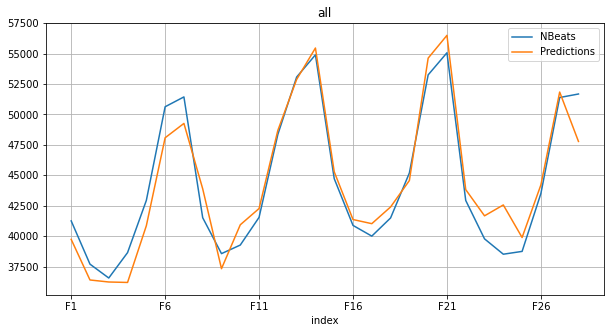

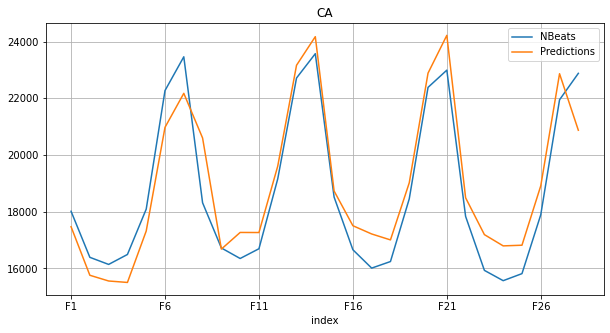

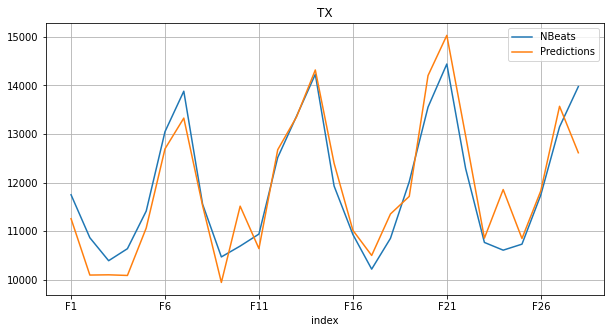

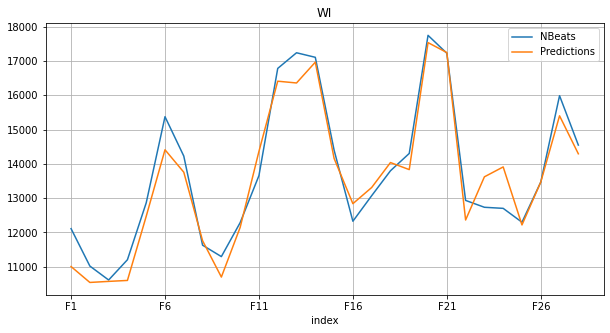

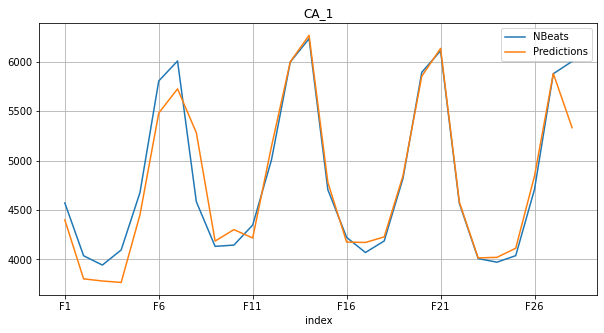

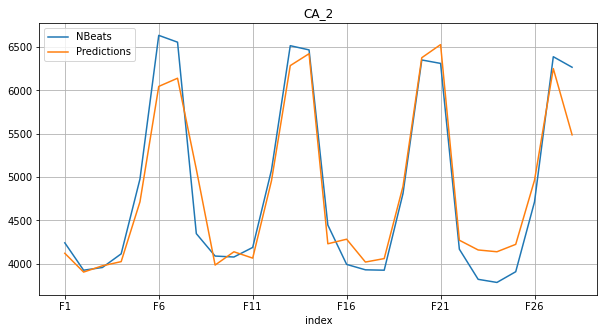

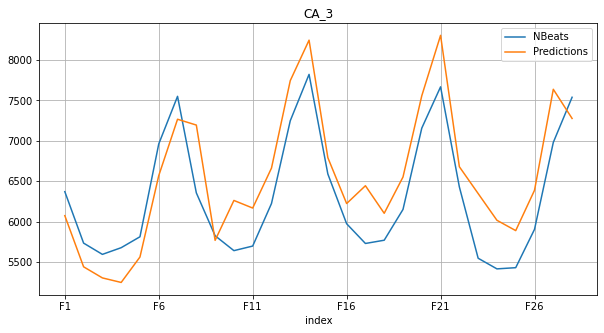

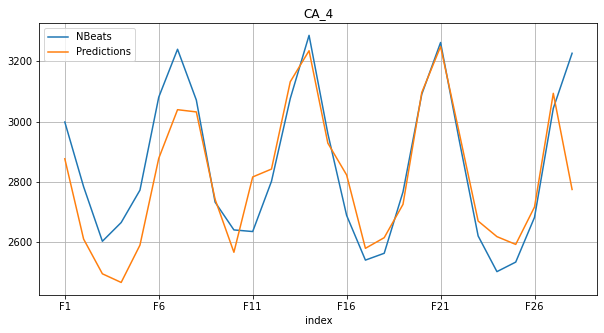

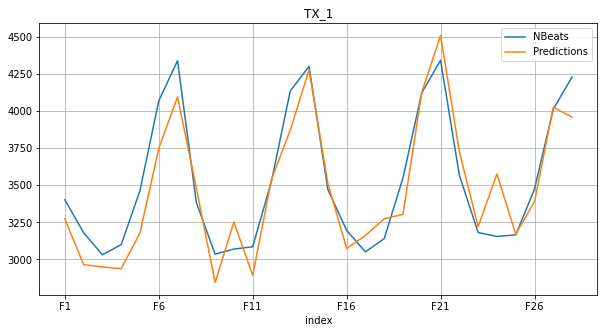

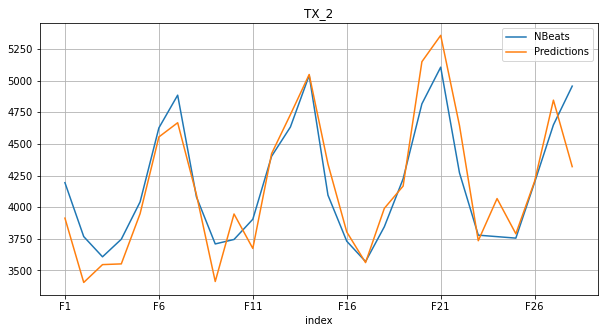

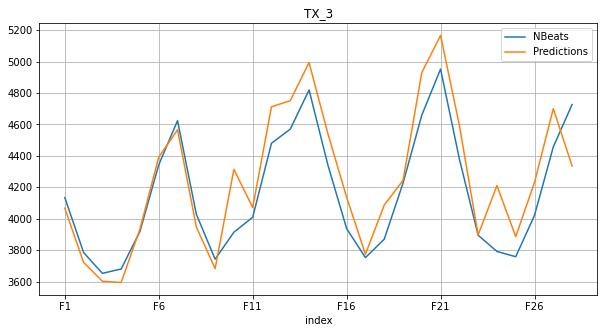

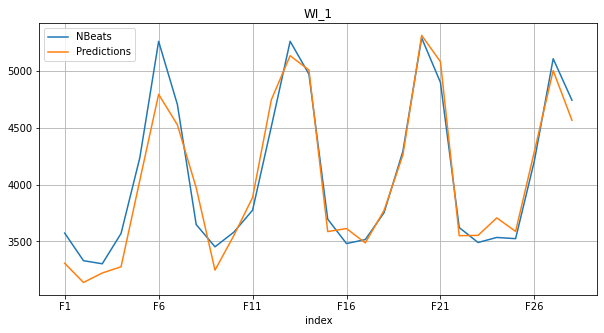

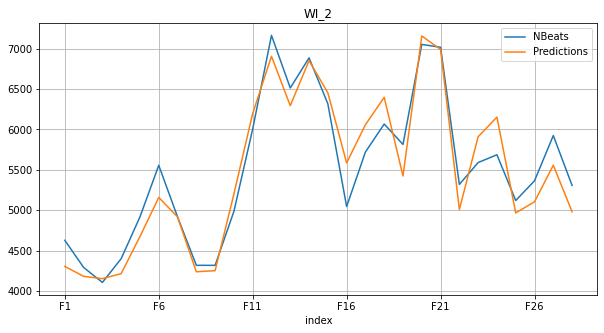

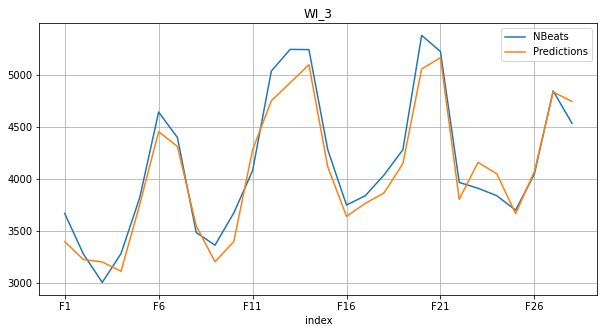

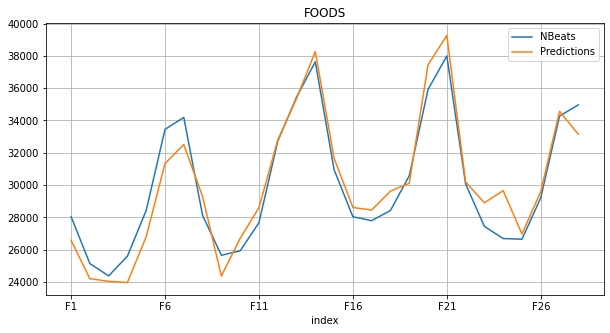

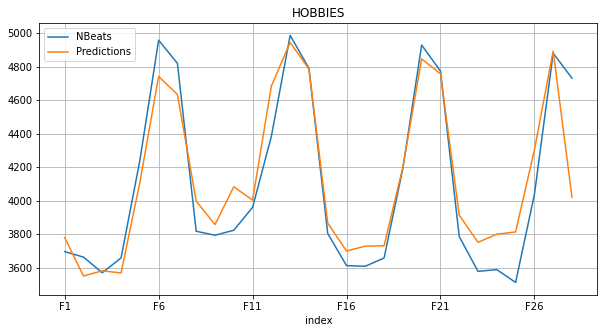

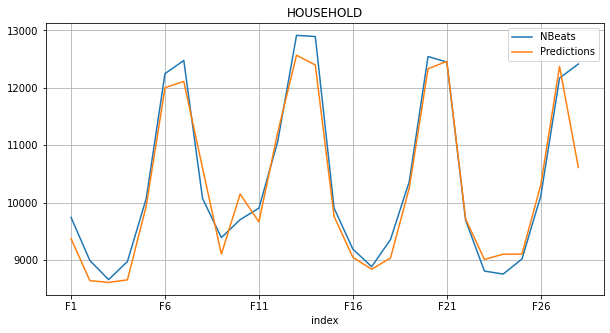

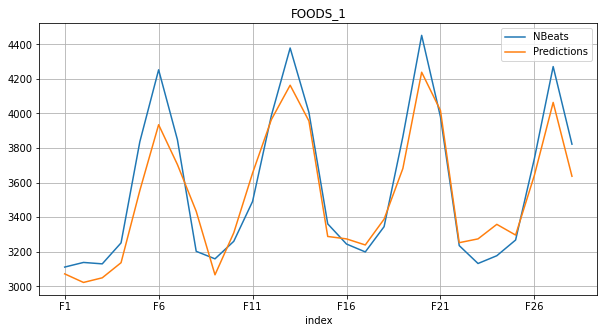

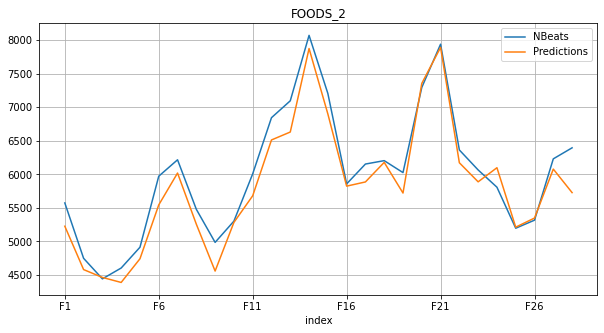

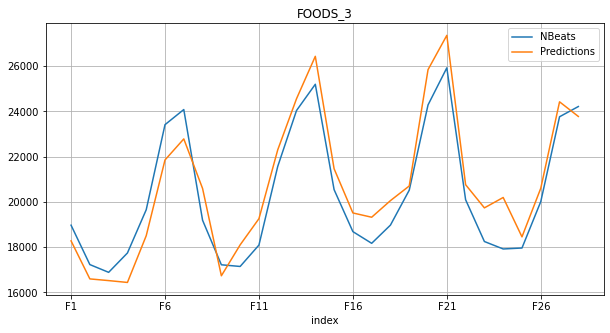

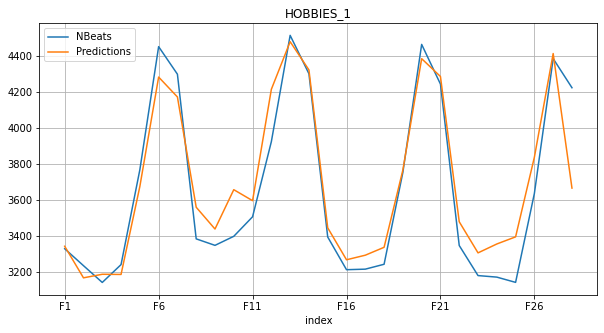

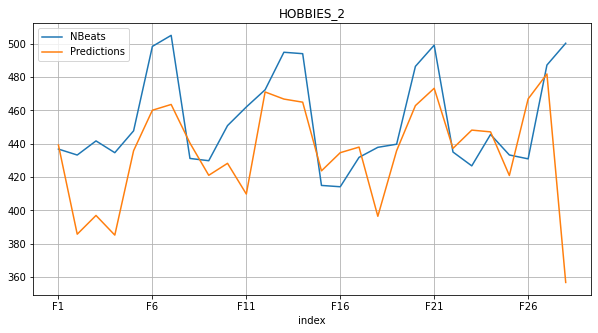

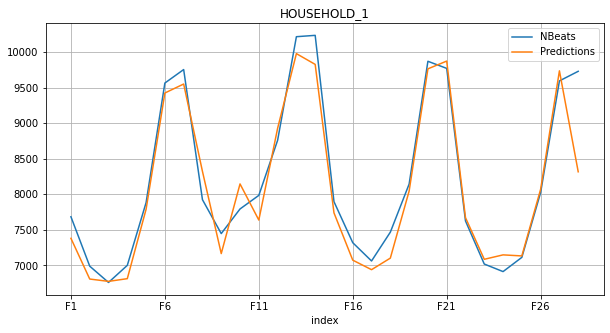

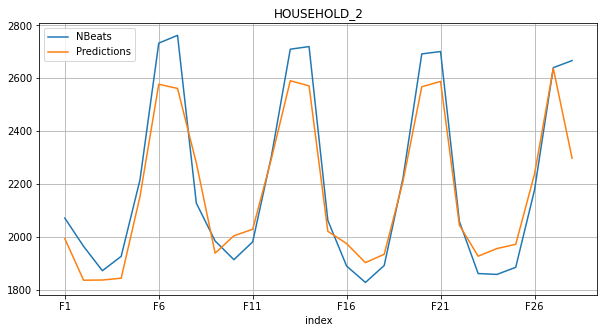

In [20]:
for i in range(0,nbeats_pred01_df.shape[0]):
    plot_df = pd.concat( [nbeats_pred01_df.iloc[i], all_pred_agg.iloc[i] ]  , axis=1, ignore_index=True)
    plot_df = plot_df.iloc[1:,]
    plot_df = plot_df.rename(columns={0:'NBeats',1:'Predictions'})
    plot_df = plot_df.reset_index()
    #plot_df
    
    plot_df.plot(x='index', y=['NBeats', 'Predictions'] ,figsize=(10,5), grid=True, title=nbeats_pred02_df.iloc[i,0]  )

**NBeats 02**

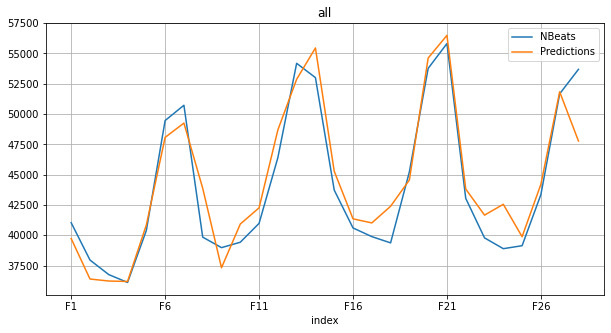

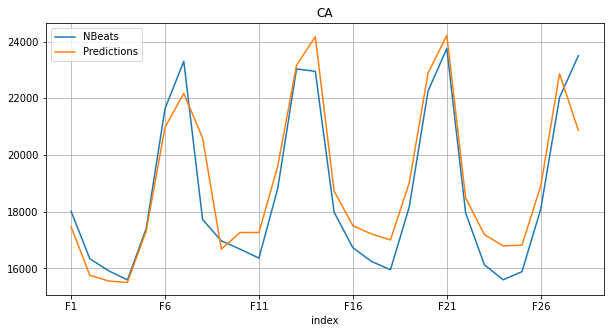

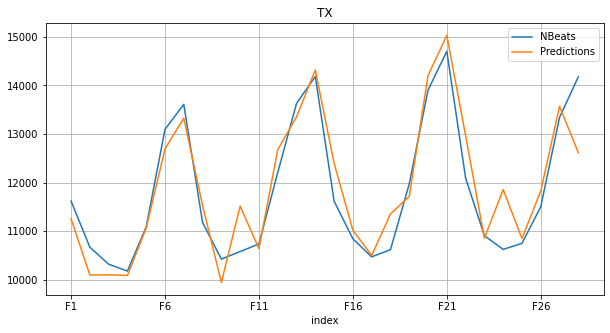

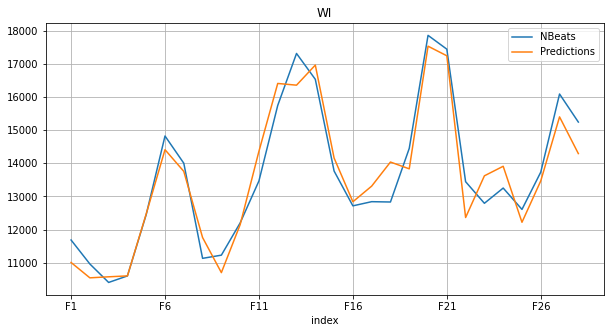

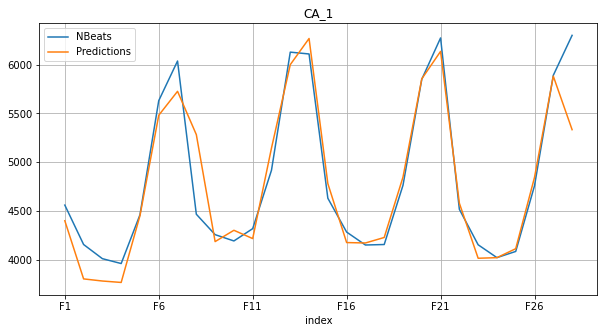

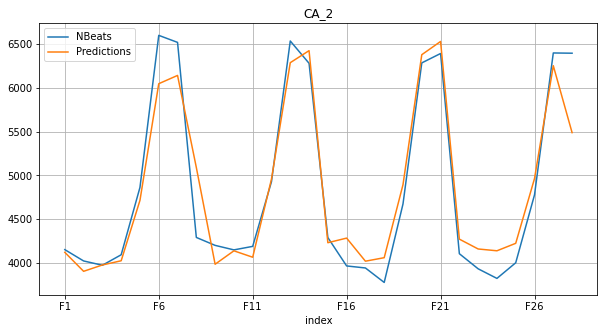

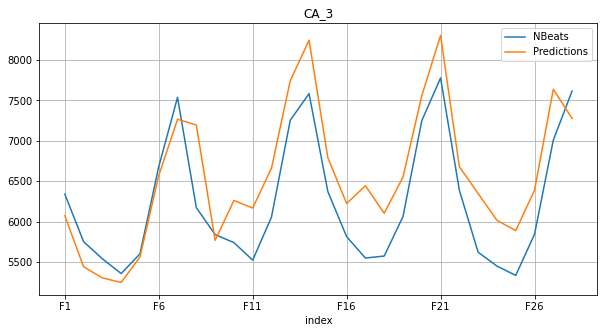

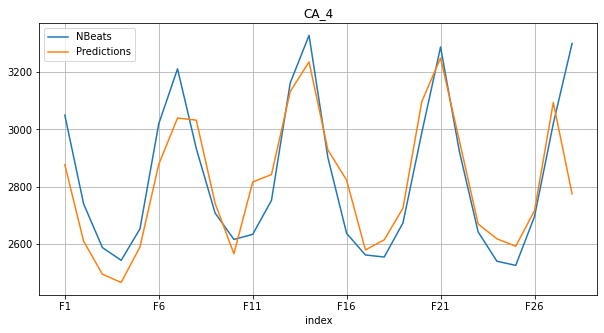

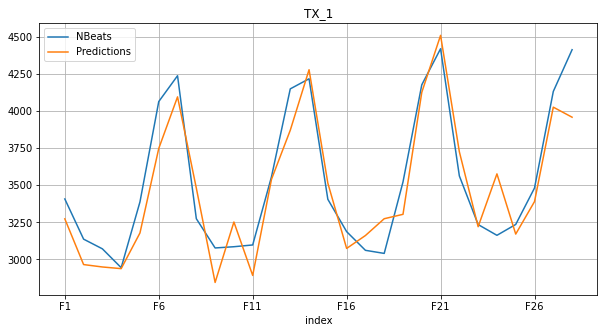

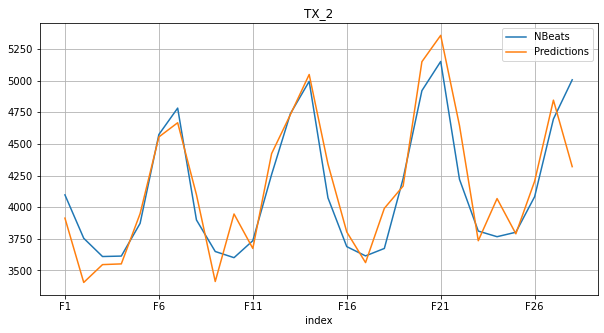

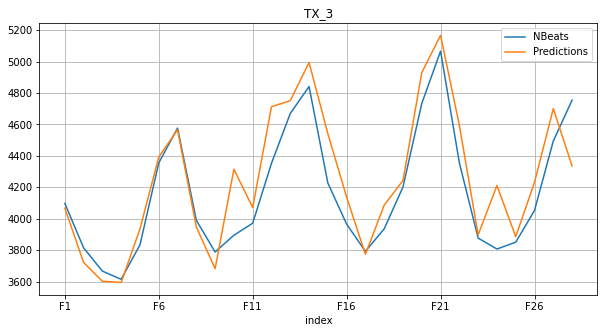

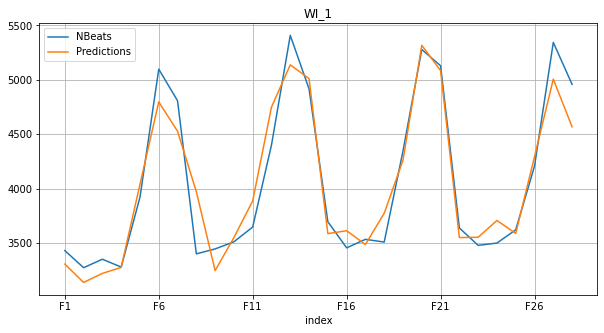

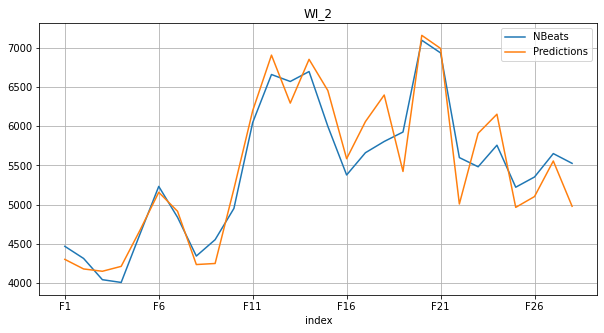

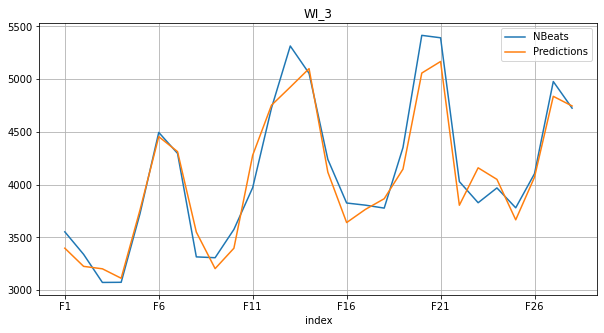

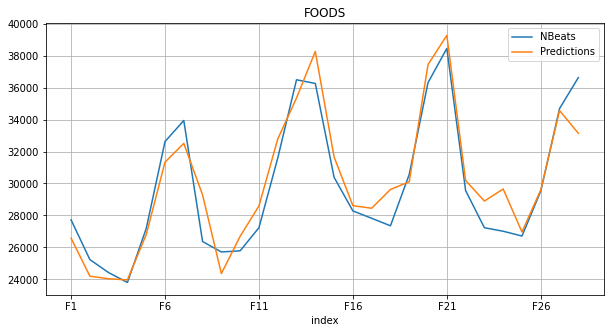

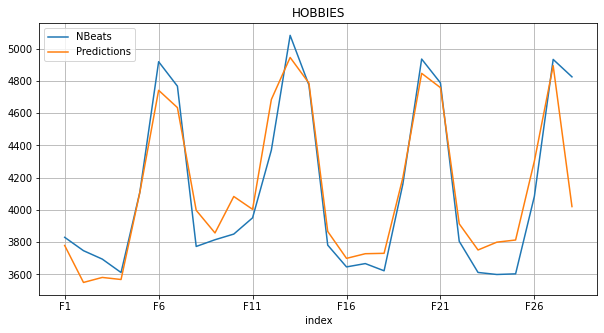

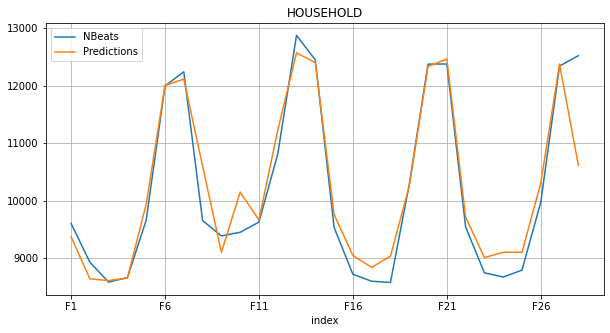

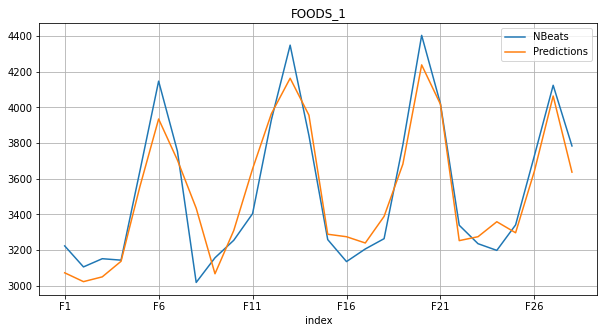

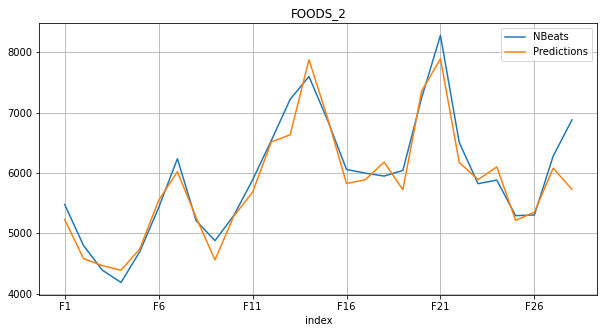

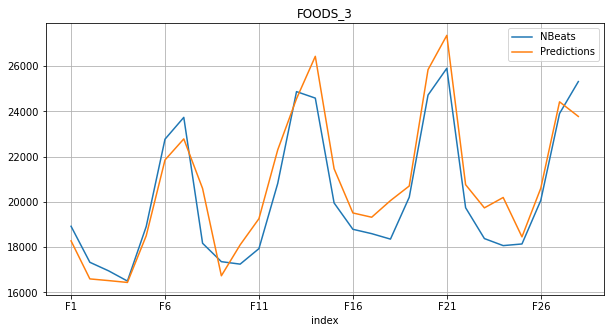

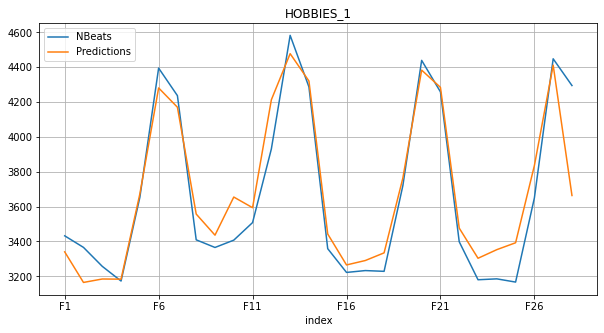

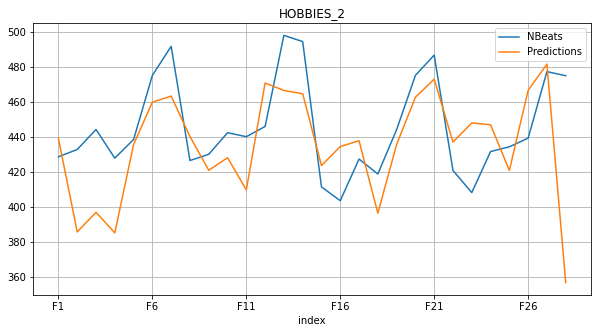

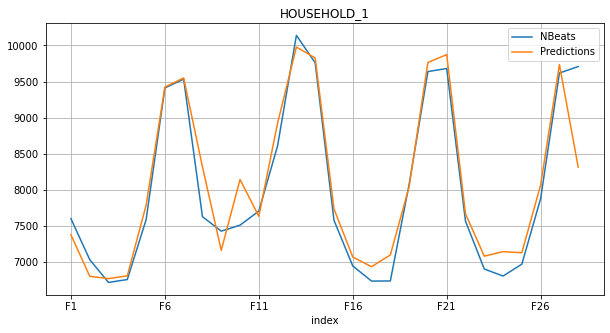

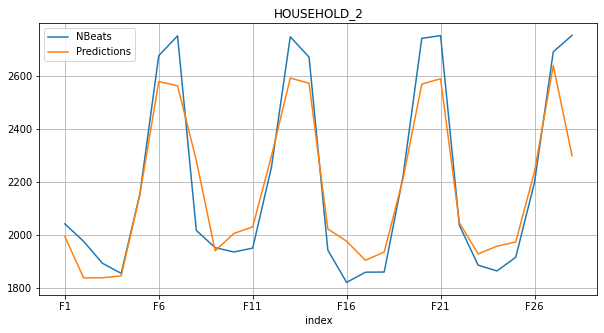

In [21]:
for i in range(0,nbeats_pred02_df.shape[0]):
    plot_df = pd.concat( [nbeats_pred02_df.iloc[i], all_pred_agg.iloc[i] ]  , axis=1, ignore_index=True)
    plot_df = plot_df.iloc[1:,]
    plot_df = plot_df.rename(columns={0:'NBeats',1:'Predictions'})
    plot_df = plot_df.reset_index()
    #plot_df
    
    plot_df.plot(x='index', y=['NBeats', 'Predictions'] ,figsize=(10,5), grid=True, title=nbeats_pred02_df.iloc[i,0]  )

In [22]:
submission_pred_df

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,2,0,3,5,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_validation,0,1,0,0,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,1,1,0,2,1,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_validation,0,0,1,2,4,1,6,4,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_validation,1,0,2,3,1,0,3,2,3,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0.267983,0.202819,0.180995,0.158913,0.196523,0.316022,0.329084,0.265166,0.203345,...,0.303824,0.482868,0.528682,0.373612,0.380386,0.395043,0.299744,0.2637,0.397206,0.404674
60976,FOODS_3_824_WI_3_evaluation,0.207812,0.142648,0.111921,0.089839,0.135425,0.289916,0.287127,0.604433,0.159269,...,0.250431,0.47974,0.505008,0.321146,0.343193,0.348946,0.238376,0.210307,0.378806,0.287079
60977,FOODS_3_825_WI_3_evaluation,0.704383,0.639219,0.605289,0.583208,0.612175,0.801702,0.819458,0.674752,0.636543,...,0.887772,1.221664,1.285441,0.978228,1.036718,1.036688,0.871191,0.826505,1.030039,1.073021
60978,FOODS_3_826_WI_3_evaluation,0.800055,0.734891,0.708476,0.656875,0.695187,0.868271,0.808028,0.763342,0.756691,...,0.829978,1.10129,1.08514,0.890115,0.910455,0.915164,0.825196,0.789854,0.961186,1.001409
